# Resistor Circuit Analysis with Mesh Analysis

This repository provides a solution to electrical resistor circuits using a procedural approach, specifically through mesh analysis. The solution leverages various techniques including graph theory, object-oriented programming, and solving systems of linear equations.

Mesh analysis is a method commonly used in electrical engineering to analyze circuits with multiple meshes, or loops. By breaking down the circuit into mesh currents, we can apply Kirchhoff's voltage law (KVL) to each mesh and solve for the unknown currents.

## Usage

To illustrate the usage of the scripts in this repository, let's consider the following example from [Electronics Tutorials](https://www.electronics-tutorials.ws/dccircuits/dcp_5.html):

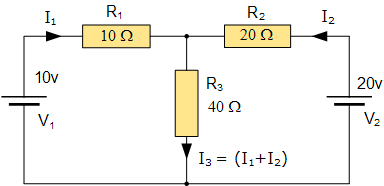

In [6]:
from IPython.display import Image
Image(filename='img/circuit.gif') 

This circuit consists of 6 nodes and 7 edges, which need to be created. To visualize the circuit, we can assign dummy position variables to place the nodes appropriately. The solution for this circuit is outlined below:

In [7]:
I1 = -0.143 # Amps
I2 = -0.429 # Amps
I3 = +0.286 # Amps

Now, we use the multiple Classes available to setup the circuit.

In [8]:
from mesh import Joint, Source, Resistor, Circuit
from graph import Nodes, Edges

# Create each of the joints present in the circuit
n0 = Joint(x=0, y=0, key=0)
n1 = Joint(x=0, y=1, key=1)
n2 = Joint(x=1, y=1, key=2)
n3 = Joint(x=2, y=1, key=3)
n4 = Joint(x=2, y=0, key=4)
n5 = Joint(x=1, y=0, key=5)

# Create each voltage source and resistor
e0 = Source(n0, n1, v=10, key=0)
e1 = Resistor(n1,n2, r=10, key=1)
e2 = Resistor(n2, n3, r=20, key=2)
e3 = Source(n3, n4, v=-20, key=3)
e4 = Resistor(n4, n5, r=0, key=4)
e5 = Resistor(n5, n0, r=0, key=5)
e6 = Resistor(n2, n5, r=40, key=6)

# Assemble the circuit
c = Circuit(
    Nodes(n0, n1, n2, n3, n4, n5), 
    Edges(e0, e1, e2, e3, e4, e5, e6))

# Solve the system
c.solve()

# Inspect the residuals to check convergence
print(c.residuals())

3.972054645195637e-15


After solving the system we can print the array of values for current and voltages or, much better, draw the circuit. We can confirm that the values drawn correspond to the correct solution of this mesh.

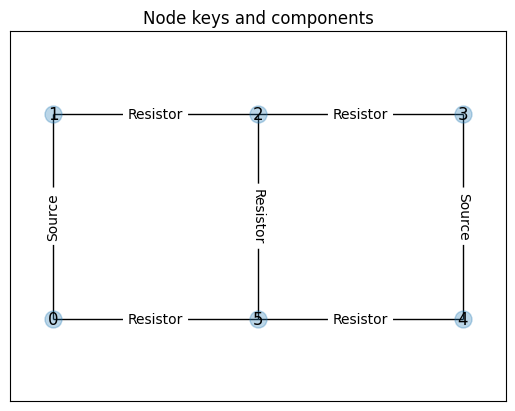

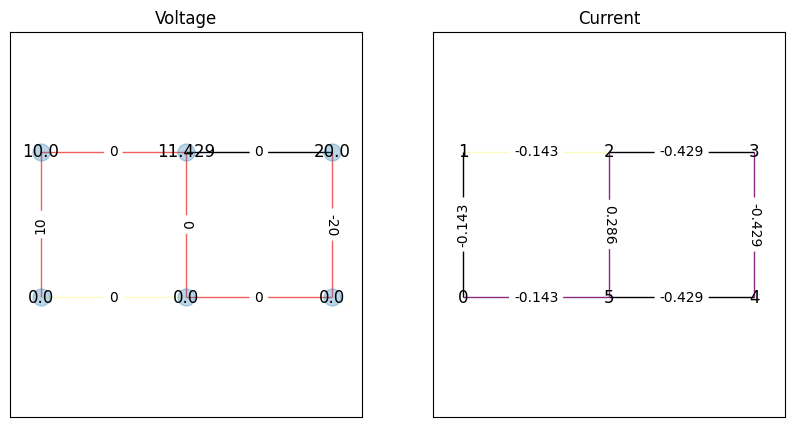

In [9]:
from analysis import draw
import matplotlib.pyplot as plt

# Get the nodal position
X = c.nodes.get('x')
Y = c.nodes.get('y')
pos = dict(zip(c.nodes, zip(X,Y)))

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.set_title('Node keys and components')

# Draw a simple plot of the circuit
draw(graph=c, ax=ax, pos=pos, nlbl='key', elbl='name')
plt.show()

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Voltage')
ax2.set_title('Current')

# Draw a plot of voltage and current flow
draw(graph=c, ax=ax1, pos=pos, nlbl='v', ndecs=3, elbl='v', edecs=3)
draw(graph=c, ax=ax2, pos=pos, nshow=False, elbl='i', edecs=3)
#plt.show()

In [15]:
import pandas as pd
from IPython.display import display

data = {
    'Name': c.nodes.get('name'),
    'Key': c.nodes.get('key'),
    'Nodal voltage (volts)': c.nodes.get('v'),
    'X-coord (-)': c.nodes.get('x'),
    'Y-coord (-)': c.nodes.get('y'),
}
df = pd.DataFrame(data)
display(df.sort_values(by='Key').round(2))

data = {
    'Name': c.edges.get('name'),
    'Key': c.edges.get('key'),
    'Vs (V)': c.edges.get('v'),
    'R (ohm)': c.edges.get('r'),
    'I (A)': c.edges.get('i'),
    'RI (V)': c.edges.get('r') * c.edges.get('i')
}
df = pd.DataFrame(data)
display(df.sort_values(by='Key').round(2))

,Name,Key,Nodal voltage (volts),X-coord (-),Y-coord (-)
5,Joint,0,0.00,0,0
4,Joint,1,10.00,0,1
3,Joint,2,11.43,1,1
2,Joint,3,20.00,2,1
0,Joint,4,0.00,2,0
1,Joint,5,0.00,1,0


,Name,Key,Vs (V),R (ohm),I (A),RI (V)
2,Source,0,10,0,-0.14,-0.00
3,Resistor,1,0,10,-0.14,-1.43
6,Resistor,2,0,20,-0.43,-8.57
4,Source,3,-20,0,-0.43,-0.00
0,Resistor,4,0,0,-0.43,-0.00
1,Resistor,5,0,0,-0.14,-0.00
5,Resistor,6,0,40,0.29,11.43
